# Assignment 17 (Support Vector Machines) Forest_Fires Dataset

## Q.  classify the Size_Categorie using SVM

## month	month of the year: 'jan' to 'dec'
## day	day of the week: 'mon' to 'sun'
## FFMC	FFMC index from the FWI system: 18.7 to 96.20
## DMC	DMC index from the FWI system: 1.1 to 291.3
## DC	DC index from the FWI system: 7.9 to 860.6
## ISI	ISI index from the FWI system: 0.0 to 56.10
## temp	temperature in Celsius degrees: 2.2 to 33.30
## RH	relative humidity in %: 15.0 to 100
## wind	wind speed in km/h: 0.40 to 9.40
## rain	outside rain in mm/m2 : 0.0 to 6.4
## Size_Categorie 	the burned area of the forest ( Small , Large)

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn import metrics
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions

In [2]:
# Loading the dataset
forest_df = pd.read_csv("forestfires.csv")

In [3]:
# Copying the dataset to another variable
forest_df1 = forest_df.copy()

In [4]:
forest_df1.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [5]:
# Checking the shape of dataframe column
forest_df1.shape

(517, 31)

In [6]:
# Summary Statistics
forest_df1.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
# Checking for null values
forest_df1.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

## Correlation Analysis 

In [8]:
# We will select only particular columns which are required for our problem
corr = forest_df1[forest_df1.columns[0:11]].corr()

<AxesSubplot:>

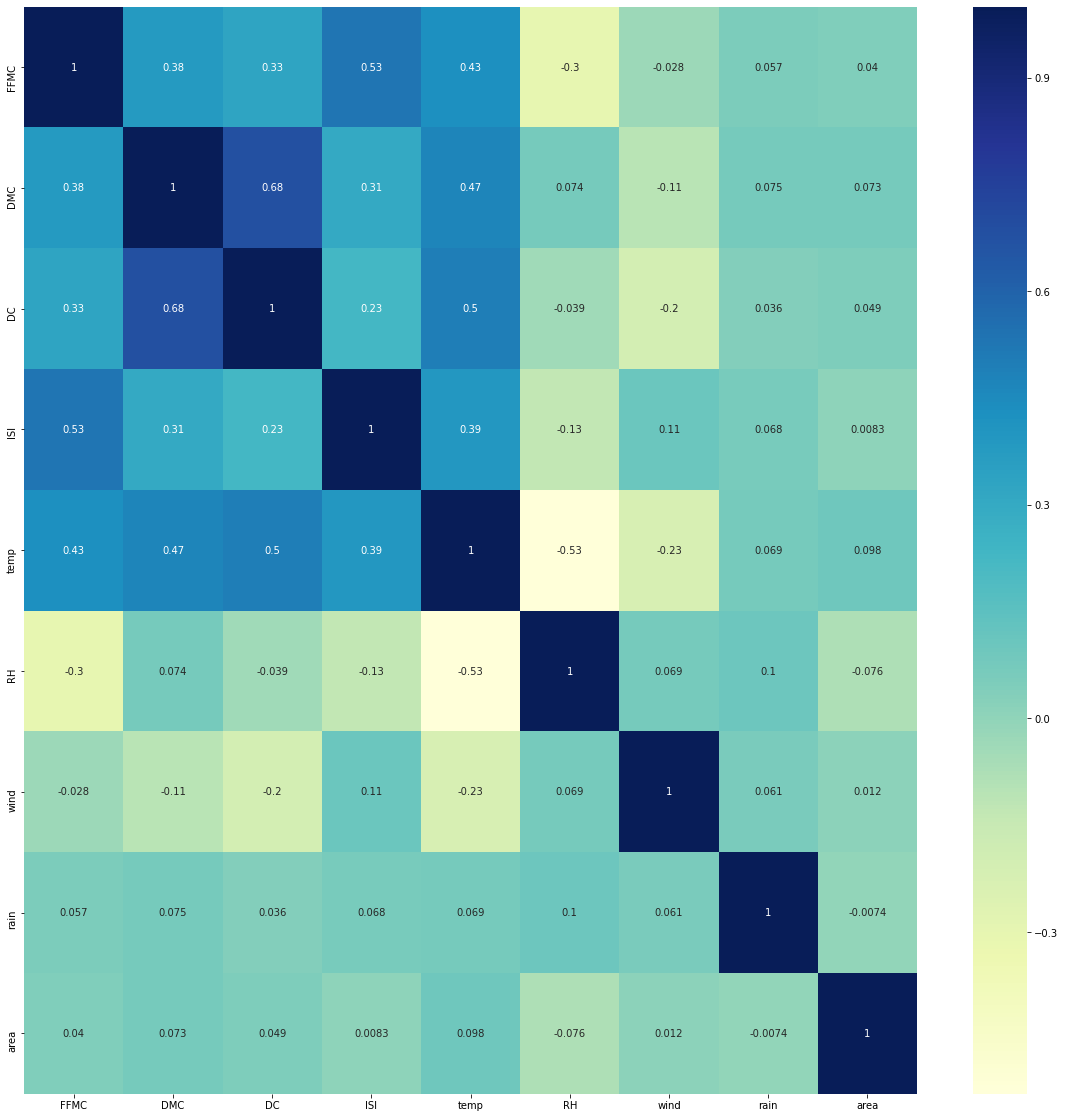

In [9]:
plt.figure(figsize=(20,20))
sns.heatmap(corr,cmap='YlGnBu',annot=True)

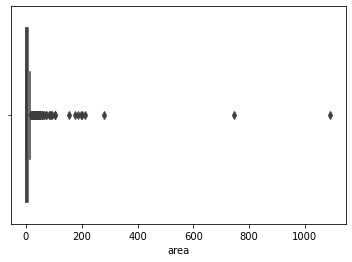

In [10]:
# Checking for outliers
ax = sns.boxplot(forest_df1['area'])

## There are 3 Outlier Instances in this Data 

In [11]:
# Adjusting the parameters 
plt.rcParams["figure.figsize"] = 9,5

Skewness : 12.846933533934868
Kurtosis : 194.1407210942299


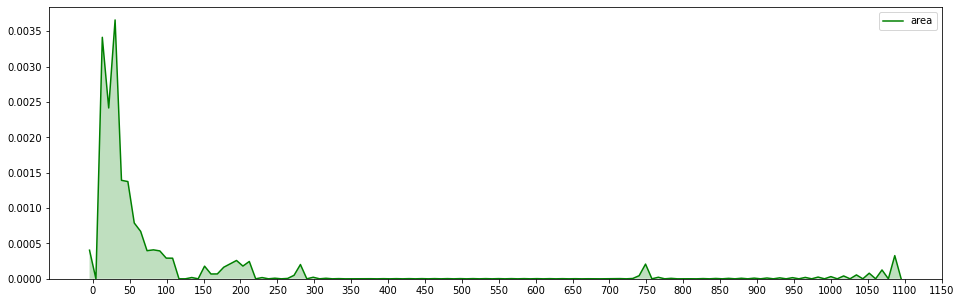

In [12]:
# Plotting Kernel Density Estimation Plot for Skewness and Kurtosis
plt.figure(figsize=(16,5))
print("Skewness : {}".format(forest_df1['area'].skew()))
print("Kurtosis : {}".format(forest_df1['area'].kurtosis()))
ax = sns.kdeplot(forest_df1['area'],shade=True,color='g')
plt.xticks([i for i in range(0,1200,50)])
plt.show()

## The Data is highly Skewed and has Large Kurtosis Value
## Majority of the Forest Fires do not cover a Large Area, Most of the Damaged Area is under 100 Hectares of Land.

In [13]:
forest_df2 = forest_df1[forest_df1.columns[0:10]]
month_column = forest_df2.select_dtypes(include='object').columns.tolist()

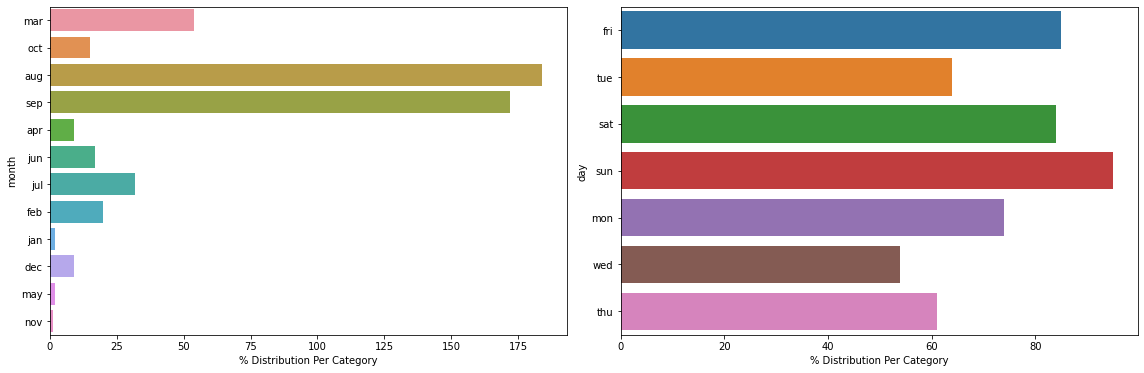

In [14]:
plt.figure(figsize=(16,10))
for i,col in enumerate(month_column,1):
    plt.subplot(2,2,i)
    sns.countplot(data=forest_df2,y=col)
    plt.ylabel(col)
    plt.xlabel('% Distribution Per Category')
plt.tight_layout()
plt.show()

## Majority of the Fire occurs in the Month of August and September.
## For Days, Sunday and Friday have Recoreded the Most Cases.  

In [15]:
num_columns = forest_df2.select_dtypes(exclude='object').columns.tolist()

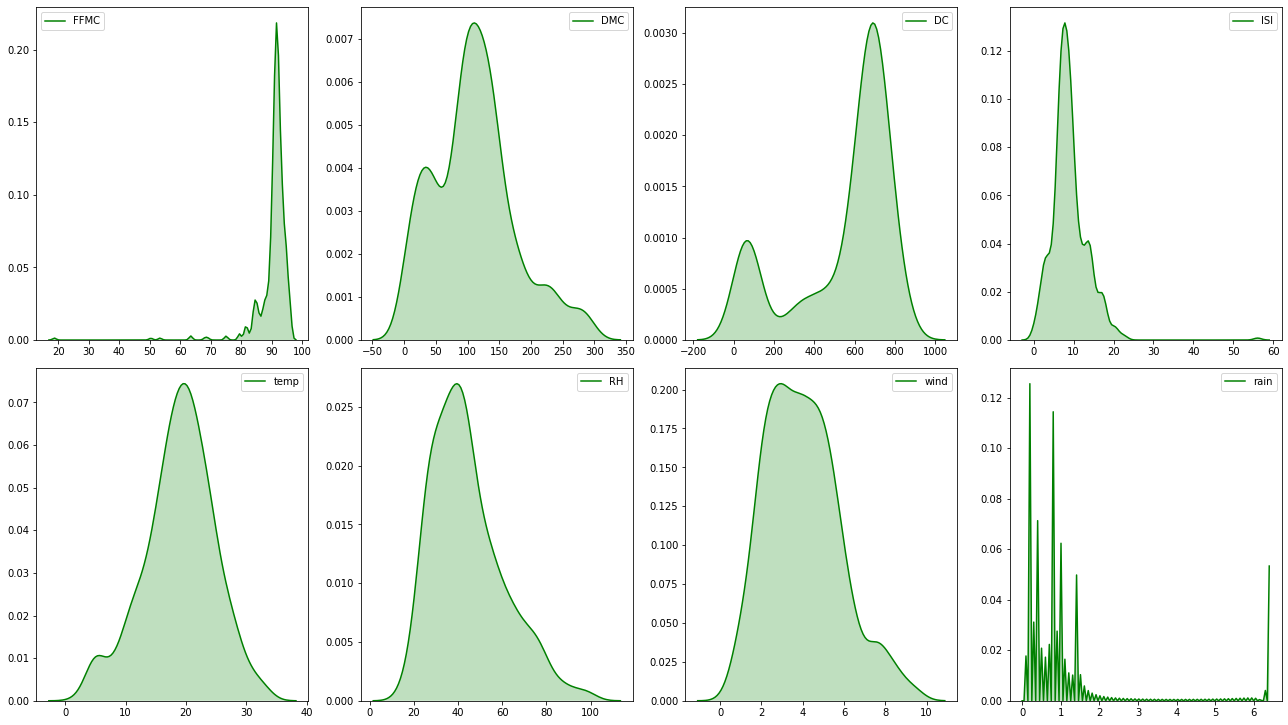

,FFMC,DMC,DC,ISI,temp,RH,wind,rain
Skewness,-6.575606,0.547498,-1.100445,2.536325,-0.331172,0.862904,0.571001,19.816344
Kurtosis,67.066041,0.204822,-0.245244,21.458037,0.136166,0.438183,0.054324,421.295964


In [16]:
plt.figure(figsize=(18,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(forest_df[col],color='g',shade=True)
plt.tight_layout() 
plt.show()
num_data = forest_df[num_columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['Skewness','Kurtosis'])

## FFMC and rain have high Kurtosis Value and DC have negative Kurtosis. 

## SVM

In [17]:
x = forest_df1.iloc[:,2:30]
y = forest_df1.iloc[:,30]

In [18]:
mapping = {'small': 1, 'large': 2}

In [19]:
y = y.replace(mapping)

In [20]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20, stratify = y)

## Linear 

In [21]:
model_linear = SVC(kernel = "linear")
model_linear.fit(x_train,y_train)
pred_test_linear = model_linear.predict(x_test)
print("Accuracy : ",metrics.accuracy_score(y_test, pred_test_linear))

Accuracy :  0.9903846153846154


## Poly 

In [22]:
model_poly = SVC(kernel = "poly")
model_poly.fit(x_train,y_train)
pred_test_poly = model_poly.predict(x_test)
print("Accuracy : ",metrics.accuracy_score(y_test, pred_test_poly))

Accuracy :  0.9807692307692307


C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


## RBF

In [23]:
model_rbf = SVC(kernel = "rbf")
model_rbf.fit(x_train,y_train)
pred_test_rbf = model_rbf.predict(x_test)
print("Accuracy : ",metrics.accuracy_score(y_test, pred_test_rbf))

Accuracy :  0.7403846153846154


C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


## Sigmoid

In [24]:
model_sigmoid = SVC(kernel = "sigmoid")
model_sigmoid.fit(x_train,y_train)
pred_test_sigmoid = model_sigmoid.predict(x_test)
print("Accuracy : ",metrics.accuracy_score(y_test, pred_test_sigmoid))

Accuracy :  0.7307692307692307


C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


## Conclusion
## Linear Model gives the best accuracy
## Below is an exmaple on how we can plot the data. I used PCA to select only 2 variables 

In [25]:
ytt = y_train.to_numpy()

In [26]:
pca = PCA(n_components = 2)

In [27]:
x_train1 = pca.fit_transform(x_train)

In [28]:
model_linear.fit(x_train1,ytt)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

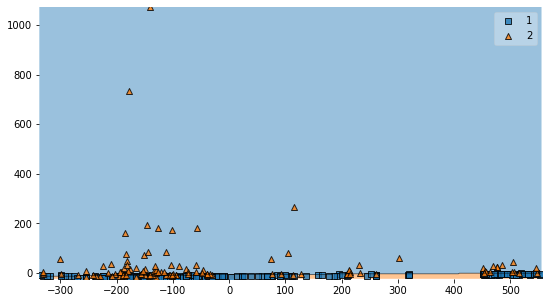

In [29]:
plot_decision_regions(x_train1,ytt, clf=model_linear)
plt.show()